In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Opening the CSV files
test = pd.read_csv('test_data.csv',encoding='cp1252')
training = pd.read_csv('training_data.csv',encoding='cp1252')

In [3]:
# We can have two methods: filling the cloudiness row (FILLING_CLOUDINESS), or removing it (REMOVING_CLOUDINESS)
method = 'FILLING_CLOUDINESS'
#method = 'REMOVING_CLOUDINESS'

In [4]:
# Checking the collumns names
training.keys()

Index(['city_name', 'record_date', 'AVERAGE_SPEED_DIFF',
       'AVERAGE_FREE_FLOW_SPEED', 'AVERAGE_TIME_DIFF',
       'AVERAGE_FREE_FLOW_TIME', 'LUMINOSITY', 'AVERAGE_TEMPERATURE',
       'AVERAGE_ATMOSP_PRESSURE', 'AVERAGE_HUMIDITY', 'AVERAGE_WIND_SPEED',
       'AVERAGE_CLOUDINESS', 'AVERAGE_PRECIPITATION', 'AVERAGE_RAIN'],
      dtype='object')

In [5]:
# Dataset Head
training.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN


In [6]:
# Dataset Info
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   city_name                6812 non-null   object 
 1   record_date              6812 non-null   object 
 2   AVERAGE_SPEED_DIFF       6812 non-null   object 
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64
 4   AVERAGE_TIME_DIFF        6812 non-null   float64
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64
 6   LUMINOSITY               6812 non-null   object 
 7   AVERAGE_TEMPERATURE      6812 non-null   float64
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64
 9   AVERAGE_HUMIDITY         6812 non-null   float64
 10  AVERAGE_WIND_SPEED       6812 non-null   float64
 11  AVERAGE_CLOUDINESS       4130 non-null   object 
 12  AVERAGE_PRECIPITATION    6812 non-null   float64
 13  AVERAGE_RAIN             563 non-null    object 
dtypes: float64(8), object(6)

In [7]:
# Dataset Description
training.describe()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION
count,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.0
mean,40.661010,25.637111,81.143952,16.193482,1017.388139,80.084190,3.058573,0.0
std,4.119023,33.510507,8.294401,5.163492,5.751061,18.238863,2.138421,0.0
min,30.500000,0.000000,46.400000,0.000000,985.000000,14.000000,0.000000,0.0
25%,37.600000,2.275000,75.400000,13.000000,1015.000000,69.750000,1.000000,0.0
50%,40.700000,12.200000,82.400000,16.000000,1017.000000,83.000000,3.000000,0.0
75%,43.500000,36.200000,87.400000,19.000000,1021.000000,93.000000,4.000000,0.0
max,55.900000,296.500000,112.000000,35.000000,1033.000000,100.000000,14.000000,0.0


In [8]:
# Seeing how many types each atribute has
training.nunique()

city_name                     1
record_date                6812
AVERAGE_SPEED_DIFF            5
AVERAGE_FREE_FLOW_SPEED     225
AVERAGE_TIME_DIFF          1151
AVERAGE_FREE_FLOW_TIME      442
LUMINOSITY                    3
AVERAGE_TEMPERATURE          38
AVERAGE_ATMOSP_PRESSURE      43
AVERAGE_HUMIDITY             77
AVERAGE_WIND_SPEED           15
AVERAGE_CLOUDINESS            9
AVERAGE_PRECIPITATION         1
AVERAGE_RAIN                 13
dtype: int64

In [9]:
# Seeing if there is any missing values
training.isna().any()

city_name                  False
record_date                False
AVERAGE_SPEED_DIFF         False
AVERAGE_FREE_FLOW_SPEED    False
AVERAGE_TIME_DIFF          False
AVERAGE_FREE_FLOW_TIME     False
LUMINOSITY                 False
AVERAGE_TEMPERATURE        False
AVERAGE_ATMOSP_PRESSURE    False
AVERAGE_HUMIDITY           False
AVERAGE_WIND_SPEED         False
AVERAGE_CLOUDINESS          True
AVERAGE_PRECIPITATION      False
AVERAGE_RAIN                True
dtype: bool

In [10]:
# Seeing how many missing values are in each collumn
print(training.isna().sum())

city_name                     0
record_date                   0
AVERAGE_SPEED_DIFF            0
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS         2682
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN               6249
dtype: int64


<AxesSubplot:>

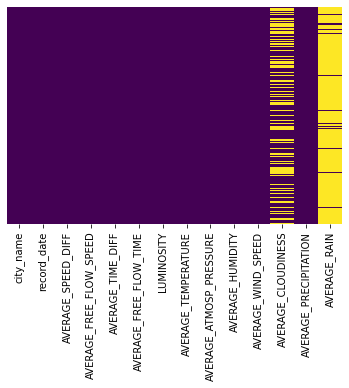

In [11]:
# Checking the heatmap
sns.heatmap(training.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [12]:
# Chaging record-date to DateTime and putting some new collumns
training.record_date = pd.to_datetime(training.record_date)
test.record_date     = pd.to_datetime(test.record_date)

training['YEAR'] = training.record_date.dt.year
test['YEAR']     = test.record_date.dt.year

training['MONTH'] = training.record_date.dt.month
test['MONTH']     = test.record_date.dt.month

training['DAY'] = training.record_date.dt.day
test['DAY']     = test.record_date.dt.day

training['HOUR'] = training.record_date.dt.hour
test['HOUR']     = test.record_date.dt.hour

In [13]:
training.describe()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_PRECIPITATION,YEAR,MONTH,DAY,HOUR
count,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.000000,6812.0,6812.000000,6812.000000,6812.000000,6812.000000
mean,40.661010,25.637111,81.143952,16.193482,1017.388139,80.084190,3.058573,0.0,2018.600117,7.088961,16.169554,11.534498
std,4.119023,33.510507,8.294401,5.163492,5.751061,18.238863,2.138421,0.0,0.489910,2.947594,8.794487,6.939520
min,30.500000,0.000000,46.400000,0.000000,985.000000,14.000000,0.000000,0.0,2018.000000,1.000000,1.000000,0.000000
25%,37.600000,2.275000,75.400000,13.000000,1015.000000,69.750000,1.000000,0.0,2018.000000,5.000000,9.000000,6.000000
50%,40.700000,12.200000,82.400000,16.000000,1017.000000,83.000000,3.000000,0.0,2019.000000,8.000000,17.000000,12.000000
75%,43.500000,36.200000,87.400000,19.000000,1021.000000,93.000000,4.000000,0.0,2019.000000,9.000000,24.000000,18.000000
max,55.900000,296.500000,112.000000,35.000000,1033.000000,100.000000,14.000000,0.0,2019.000000,12.000000,31.000000,23.000000


In [14]:
training.head()

,city_name,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,AVERAGE_RAIN,YEAR,MONTH,DAY,HOUR
0,Porto,2019-08-29 07:00:00,Medium,41.5,11.5,71.4,LIGHT,15.0,1019.0,100.0,3.0,NaN,0.0,NaN,2019,8,29,7
1,Porto,2018-08-10 14:00:00,High,41.7,48.3,87.4,LIGHT,21.0,1021.0,53.0,5.0,céu claro,0.0,NaN,2018,8,10,14
2,Porto,2019-09-01 16:00:00,High,38.6,38.4,85.2,LIGHT,26.0,1014.0,61.0,4.0,NaN,0.0,NaN,2019,9,1,16
3,Porto,2019-02-26 11:00:00,High,37.4,61.0,94.1,LIGHT,18.0,1025.0,48.0,4.0,céu claro,0.0,NaN,2019,2,26,11
4,Porto,2019-06-06 12:00:00,Medium,41.6,50.4,77.0,LIGHT,15.0,1008.0,82.0,10.0,NaN,0.0,NaN,2019,6,6,12


In [15]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6812 entries, 0 to 6811
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   city_name                6812 non-null   object        
 1   record_date              6812 non-null   datetime64[ns]
 2   AVERAGE_SPEED_DIFF       6812 non-null   object        
 3   AVERAGE_FREE_FLOW_SPEED  6812 non-null   float64       
 4   AVERAGE_TIME_DIFF        6812 non-null   float64       
 5   AVERAGE_FREE_FLOW_TIME   6812 non-null   float64       
 6   LUMINOSITY               6812 non-null   object        
 7   AVERAGE_TEMPERATURE      6812 non-null   float64       
 8   AVERAGE_ATMOSP_PRESSURE  6812 non-null   float64       
 9   AVERAGE_HUMIDITY         6812 non-null   float64       
 10  AVERAGE_WIND_SPEED       6812 non-null   float64       
 11  AVERAGE_CLOUDINESS       4130 non-null   object        
 12  AVERAGE_PRECIPITATION    6812 non-

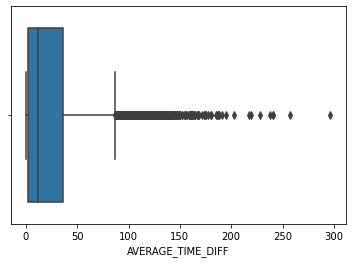

In [16]:
# Checking it there is outliers
ax1 = sns.boxplot(x=training['AVERAGE_TIME_DIFF'])

In [17]:
# Removing the outliers
training = training.loc[training['AVERAGE_TIME_DIFF']<=200]

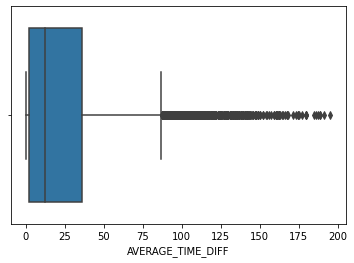

In [18]:
# Checking it the outliers
ax1 = sns.boxplot(x=training['AVERAGE_TIME_DIFF'])

In [19]:
training.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6803 entries, 0 to 6811
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   city_name                6803 non-null   object        
 1   record_date              6803 non-null   datetime64[ns]
 2   AVERAGE_SPEED_DIFF       6803 non-null   object        
 3   AVERAGE_FREE_FLOW_SPEED  6803 non-null   float64       
 4   AVERAGE_TIME_DIFF        6803 non-null   float64       
 5   AVERAGE_FREE_FLOW_TIME   6803 non-null   float64       
 6   LUMINOSITY               6803 non-null   object        
 7   AVERAGE_TEMPERATURE      6803 non-null   float64       
 8   AVERAGE_ATMOSP_PRESSURE  6803 non-null   float64       
 9   AVERAGE_HUMIDITY         6803 non-null   float64       
 10  AVERAGE_WIND_SPEED       6803 non-null   float64       
 11  AVERAGE_CLOUDINESS       4123 non-null   object        
 12  AVERAGE_PRECIPITATION    6803 non-

In [20]:
# Checking LUMINOSITY qualitative classifiers
training['LUMINOSITY'].unique()

array(['LIGHT', 'LOW_LIGHT', 'DARK'], dtype=object)

In [21]:
# Checking AVERAGE_CLOUDINESS qualitative classifiers
training['AVERAGE_CLOUDINESS'].unique()

array([nan, 'céu claro', 'nuvens dispersas', 'céu pouco nublado',
       'céu limpo', 'algumas nuvens', 'nuvens quebrados', 'tempo nublado',
       'nuvens quebradas', 'nublado'], dtype=object)

In [22]:
# Checking AVERAGE_CLOUDINESS qualitative classifiers
test['AVERAGE_CLOUDINESS'].unique()

array(['céu claro', 'nuvens dispersas', nan, 'céu pouco nublado',
       'nuvens quebradas', 'algumas nuvens', 'nuvens quebrados',
       'nublado', 'céu limpo', 'tempo nublado'], dtype=object)

In [23]:
# Changing qualitative classifiers to quantitative classifiers

training_luminosity_qt = {'LIGHT': 1, 'LOW_LIGHT': 2, 'DARK': 3}
training_cloudiness_qt = {'céu limpo': 1, 'céu claro': 2, 'nuvens dispersas': 3, 'algumas nuvens': 4, 'céu pouco nublado': 5, 'nuvens quebrados': 6, 'nuvens quebradas': 6, 'tempo nublado': 7, 'nublado': 8}
training_speed_diff_qt = {'None': 1, 'Low': 2, 'Medium': 3, 'High': 4, 'Very_High': 5}

training.replace(training_luminosity_qt, inplace = True)
training.replace(training_cloudiness_qt, inplace = True)
training.replace(training_speed_diff_qt, inplace = True)

test.replace(training_luminosity_qt, inplace = True)
test.replace(training_cloudiness_qt, inplace = True)
if method == 'FILLING_CLOUDINESS':
    test['AVERAGE_CLOUDINESS'] = test['AVERAGE_CLOUDINESS'].fillna(0)

In [24]:
training.describe()

,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,AVERAGE_PRECIPITATION,YEAR,MONTH,DAY,HOUR
count,6803.000000,6803.000000,6803.000000,6803.000000,6803.000000,6803.000000,6803.000000,6803.000000,6803.000000,4123.000000,6803.0,6803.000000,6803.000000,6803.000000,6803.000000
mean,2.439953,40.661693,25.356475,81.139042,1.994855,16.193591,1017.388211,80.088858,3.058210,3.668445,0.0,2018.600029,7.088931,16.168014,11.529913
std,1.274349,4.117558,32.618230,8.293700,0.980463,5.164446,5.746888,18.244849,2.138024,1.799224,0.0,0.489928,2.947327,8.797127,6.941269
min,1.000000,30.500000,0.000000,46.400000,1.000000,0.000000,985.000000,14.000000,0.000000,1.000000,0.0,2018.000000,1.000000,1.000000,0.000000
25%,1.000000,37.600000,2.200000,75.400000,1.000000,13.000000,1015.000000,69.500000,1.000000,2.000000,0.0,2018.000000,5.000000,9.000000,6.000000
50%,2.000000,40.700000,12.200000,82.400000,2.000000,16.000000,1017.000000,83.000000,3.000000,3.000000,0.0,2019.000000,8.000000,17.000000,12.000000
75%,3.000000,43.500000,36.100000,87.400000,3.000000,19.000000,1021.000000,93.000000,4.000000,5.000000,0.0,2019.000000,9.000000,24.000000,18.000000
max,5.000000,55.900000,195.300000,112.000000,3.000000,35.000000,1033.000000,100.000000,14.000000,8.000000,0.0,2019.000000,12.000000,31.000000,23.000000


In [25]:
# Seeing if there is any missing values
training.isna().any()

city_name                  False
record_date                False
AVERAGE_SPEED_DIFF         False
AVERAGE_FREE_FLOW_SPEED    False
AVERAGE_TIME_DIFF          False
AVERAGE_FREE_FLOW_TIME     False
LUMINOSITY                 False
AVERAGE_TEMPERATURE        False
AVERAGE_ATMOSP_PRESSURE    False
AVERAGE_HUMIDITY           False
AVERAGE_WIND_SPEED         False
AVERAGE_CLOUDINESS          True
AVERAGE_PRECIPITATION      False
AVERAGE_RAIN                True
YEAR                       False
MONTH                      False
DAY                        False
HOUR                       False
dtype: bool

In [26]:
# Seeing how many missing values are in each collumn
print(training.isna().sum())

city_name                     0
record_date                   0
AVERAGE_SPEED_DIFF            0
AVERAGE_FREE_FLOW_SPEED       0
AVERAGE_TIME_DIFF             0
AVERAGE_FREE_FLOW_TIME        0
LUMINOSITY                    0
AVERAGE_TEMPERATURE           0
AVERAGE_ATMOSP_PRESSURE       0
AVERAGE_HUMIDITY              0
AVERAGE_WIND_SPEED            0
AVERAGE_CLOUDINESS         2680
AVERAGE_PRECIPITATION         0
AVERAGE_RAIN               6240
YEAR                          0
MONTH                         0
DAY                           0
HOUR                          0
dtype: int64


<AxesSubplot:>

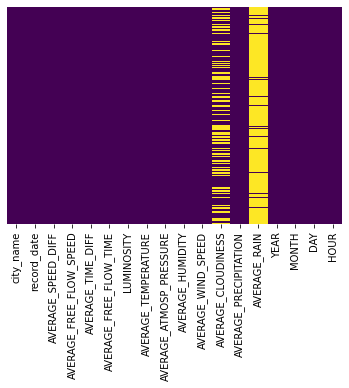

In [27]:
# Checking the heatmap
sns.heatmap(training.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [28]:
# Because there are a almost no data if AVERAGE_RAIN, we will drop this collumn
training = training.drop(['AVERAGE_RAIN'], axis=1)
test = test.drop(['AVERAGE_RAIN'], axis=1)

In [29]:
# Now we are filling the missing Data via interpolation
if method == 'FILLING_CLOUDINESS':
    training['AVERAGE_CLOUDINESS'] = training['AVERAGE_CLOUDINESS'].fillna(method='bfill')
    training['AVERAGE_CLOUDINESS'] = training['AVERAGE_CLOUDINESS'].interpolate(method='linear',limit_direction='forward')

In [30]:
# Removing the Cloundiness if we want too
if method == 'REMOVING_CLOUDINESS':
    training.drop(['AVERAGE_CLOUDINESS'], axis=1, inplace=True)
    test.drop(['AVERAGE_CLOUDINESS'], axis=1, inplace=True)

<AxesSubplot:>

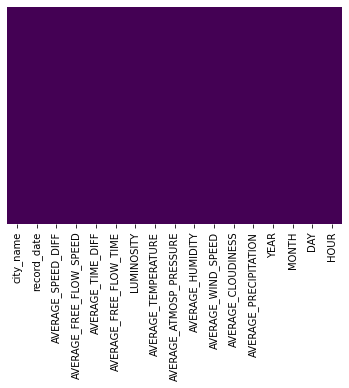

In [31]:
# Checking the heatmap again so we can see that no value is missing now
sns.heatmap(training.isnull(), yticklabels=False, cbar=False, cmap='viridis')

In [32]:
# Now it's time to drop the rows that are duplicated 
training = training.drop_duplicates(subset=('city_name','record_date'), keep='first')

In [33]:
# Finnaly we will remove the rows where the values are all the same
for name in training.keys():
    listaDados = training[name]
    element = listaDados[0]
    chk     = True
    for item in listaDados:
        if element != item:
            chk = False
            break;
    if chk:
        training = training.drop([name], axis=1)
        test = test.drop([name], axis=1)

<AxesSubplot:>

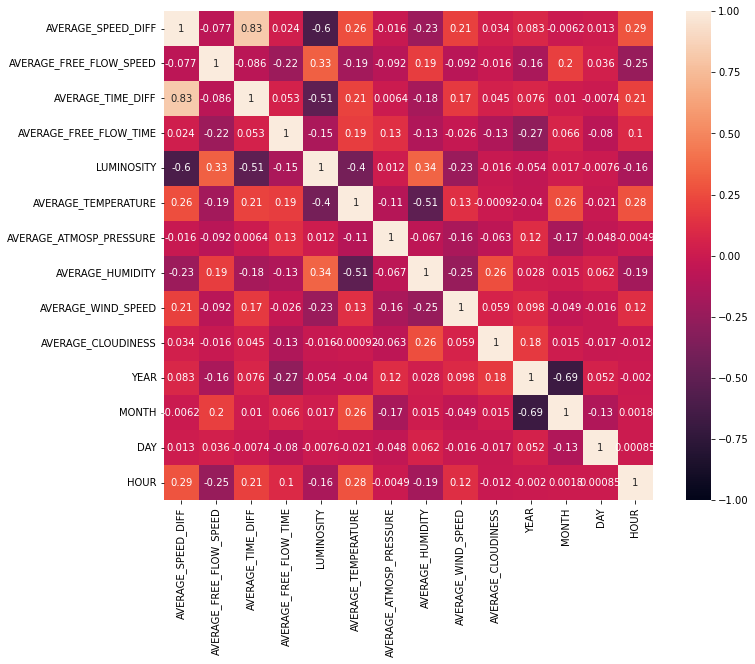

In [34]:
# Matriz de coorelação
corr_matrix = training.corr()
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, square=True, annot=True)

In [35]:
# Vizualize how the training Dataset is at the moment
training.head()

,record_date,AVERAGE_SPEED_DIFF,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,YEAR,MONTH,DAY,HOUR
0,2019-08-29 07:00:00,3,41.5,11.5,71.4,1,15.0,1019.0,100.0,3.0,2.0,2019,8,29,7
1,2018-08-10 14:00:00,4,41.7,48.3,87.4,1,21.0,1021.0,53.0,5.0,2.0,2018,8,10,14
2,2019-09-01 16:00:00,4,38.6,38.4,85.2,1,26.0,1014.0,61.0,4.0,2.0,2019,9,1,16
3,2019-02-26 11:00:00,4,37.4,61.0,94.1,1,18.0,1025.0,48.0,4.0,2.0,2019,2,26,11
4,2019-06-06 12:00:00,3,41.6,50.4,77.0,1,15.0,1008.0,82.0,10.0,3.0,2019,6,6,12


In [36]:
# Starting to prepare the Predicitions
from sklearn.preprocessing import MinMaxScaler

training.drop(['record_date'], axis=1, inplace=True)
test.drop(['record_date'], axis=1, inplace=True)

X = training.drop(['AVERAGE_SPEED_DIFF'], axis=1)
y = training['AVERAGE_SPEED_DIFF']

In [37]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=2021)

<AxesSubplot:xlabel='AVERAGE_SPEED_DIFF', ylabel='count'>

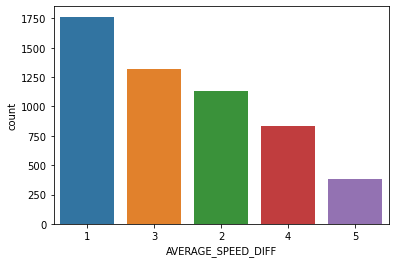

In [38]:
# Checking the values in y_train
sns.countplot(x = y_train, order = training['AVERAGE_SPEED_DIFF'].value_counts().index)

<AxesSubplot:xlabel='AVERAGE_SPEED_DIFF', ylabel='count'>

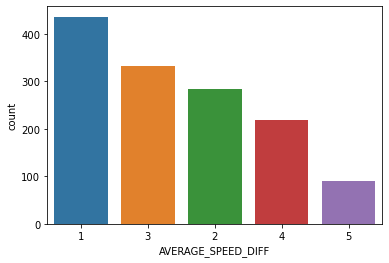

In [39]:
# Checking if the values in y_test look like the ones in y_train 
sns.countplot(x = y_test, order = training['AVERAGE_SPEED_DIFF'].value_counts().index)

In [40]:
# Using the Decision Tree Classifier Regression method

from sklearn.tree import DecisionTreeClassifier

treemodel = DecisionTreeClassifier(random_state=2021)
treemodel.fit(X_train,y_train)

predictions = treemodel.predict(X_test)
predictions

array([1, 1, 3, ..., 5, 1, 3], dtype=int64)

              precision    recall  f1-score   support

           1       0.86      0.82      0.84       436
           2       0.60      0.60      0.60       283
           3       0.69      0.70      0.69       332
           4       0.66      0.69      0.67       219
           5       0.78      0.79      0.79        91

    accuracy                           0.72      1361
   macro avg       0.72      0.72      0.72      1361
weighted avg       0.72      0.72      0.72      1361

You have got  0.72 accuracy  in this prediction


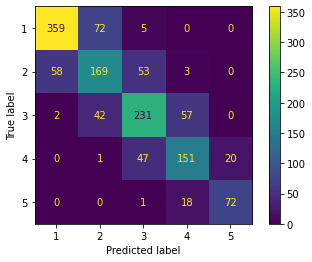

In [41]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Printing the results
print(classification_report(y_test,predictions))
print("You have got \033[1m %0.2f accuracy \033[0m in this prediction" % accuracy_score(y_test,predictions))

#Printing the ConfusionMatrix
cm = confusion_matrix(y_test, predictions, labels=treemodel.classes_)
disp = ConfusionMatrixDisplay (confusion_matrix=cm, display_labels=treemodel.classes_)
disp.plot()

In [42]:
# Using the Linear Regression method

from sklearn.linear_model import LinearRegression

linearmodel = LinearRegression()
linearmodel.fit(X_train,y_train)

predictions = linearmodel.predict(X_test)
predictions

array([2.41198601, 1.82329531, 2.96901399, ..., 4.84065079, 1.41786024,
       1.61860316])

You have got  0.75 accuracy  in this prediction


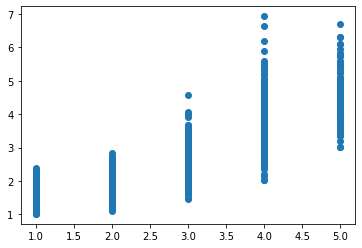

In [43]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, r2_score

# Printing the results

print("You have got \033[1m %0.2f accuracy \033[0m in this prediction" % r2_score(y_test, predictions))

plt.scatter(y_test, predictions)

In [44]:
# Using the Logistic Regression method

from sklearn.linear_model import LogisticRegression

logmodel = LogisticRegression(max_iter=10000, random_state=2021)
logmodel.fit(X_train,y_train)

predictions = logmodel.predict(X_test)
predictions

array([2, 1, 3, ..., 5, 2, 2], dtype=int64)

              precision    recall  f1-score   support

           1       0.87      0.93      0.90       436
           2       0.73      0.69      0.71       283
           3       0.77      0.79      0.78       332
           4       0.76      0.68      0.72       219
           5       0.80      0.74      0.77        91

    accuracy                           0.80      1361
   macro avg       0.78      0.77      0.77      1361
weighted avg       0.79      0.80      0.79      1361

You have got  0.79500 accuracy  in this prediction


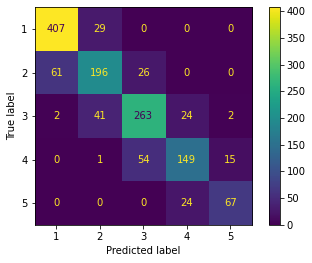

In [45]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Printing the results
print(classification_report(y_test,predictions))
print("You have got \033[1m %0.5f accuracy \033[0m in this prediction" % accuracy_score(y_test,predictions))


#Printing the ConfusionMatrix
cm = confusion_matrix(y_test, predictions, labels=logmodel.classes_)
disp = ConfusionMatrixDisplay (confusion_matrix=cm, display_labels=logmodel.classes_)
disp.plot()

In [46]:
# Using the Logistic Regression method

from sklearn.svm import SVC

svcmodel = SVC(random_state=2021)
svcmodel.fit(X_train, np.ravel(y_train))

predictions = svcmodel.predict(X_test)
predictions

array([1, 1, 1, ..., 4, 1, 1], dtype=int64)

              precision    recall  f1-score   support

           1       0.37      1.00      0.54       436
           2       0.00      0.00      0.00       283
           3       0.07      0.03      0.05       332
           4       0.46      0.10      0.16       219
           5       0.00      0.00      0.00        91

    accuracy                           0.34      1361
   macro avg       0.18      0.23      0.15      1361
weighted avg       0.21      0.34      0.21      1361

You have got  0.34 accuracy  in this prediction


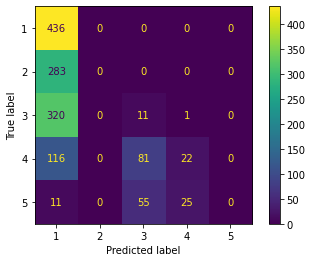

In [47]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Printing the results
print(classification_report(y_test,predictions, zero_division=0))
print("You have got \033[1m %0.2f accuracy \033[0m in this prediction" % accuracy_score(y_test,predictions))

#Printing the ConfusionMatrix
cm = confusion_matrix(y_test, predictions, labels=svcmodel.classes_)
disp = ConfusionMatrixDisplay (confusion_matrix=cm, display_labels=svcmodel.classes_)
disp.plot()

In [48]:
# Using the GridSeacrh method

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures

param_grid = {'C':[200], 'gamma':[0.0001], 'kernel':['rbf']}

grid = GridSearchCV(SVC(random_state=2021), param_grid, refit=True, verbose=3)

grid.fit(X_train, np.ravel(y_train))

Fitting 5 folds for each of 1 candidates, totalling 5 fits
[CV 1/5] END ...C=200, gamma=0.0001, kernel=rbf;, score=0.783 total time=   0.6s
[CV 2/5] END ...C=200, gamma=0.0001, kernel=rbf;, score=0.797 total time=   0.6s
[CV 3/5] END ...C=200, gamma=0.0001, kernel=rbf;, score=0.790 total time=   0.6s
[CV 4/5] END ...C=200, gamma=0.0001, kernel=rbf;, score=0.770 total time=   0.6s
[CV 5/5] END ...C=200, gamma=0.0001, kernel=rbf;, score=0.777 total time=   0.6s


GridSearchCV(estimator=SVC(random_state=2021),
             param_grid={'C': [200], 'gamma': [0.0001], 'kernel': ['rbf']},
             verbose=3)

In [49]:
grid.best_params_

{'C': 200, 'gamma': 0.0001, 'kernel': 'rbf'}

In [50]:
grid.best_estimator_

SVC(C=200, gamma=0.0001, random_state=2021)

In [51]:
predictions = grid.predict(X_test)
predictions

array([2, 1, 3, ..., 5, 2, 2], dtype=int64)

              precision    recall  f1-score   support

           1       0.87      0.92      0.89       436
           2       0.70      0.66      0.68       283
           3       0.77      0.77      0.77       332
           4       0.76      0.75      0.76       219
           5       0.82      0.81      0.82        91

    accuracy                           0.79      1361
   macro avg       0.79      0.78      0.78      1361
weighted avg       0.79      0.79      0.79      1361

You have got  0.79427 accuracy  in this prediction


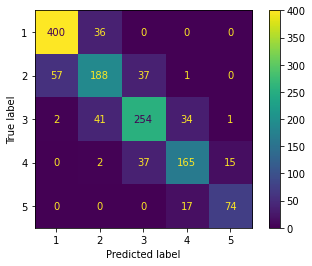

In [52]:
from sklearn.metrics import classification_report, plot_confusion_matrix, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Printing the results
print(classification_report(y_test,predictions))
print("You have got \033[1m %0.5f accuracy \033[0m in this prediction" % accuracy_score(y_test,predictions))

cm = confusion_matrix(y_test, predictions, labels=grid.classes_)
disp = ConfusionMatrixDisplay (confusion_matrix=cm, display_labels=grid.classes_)
disp.plot()

In [53]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import GridSearchCV, KFold, train_test_split
from sklearn.preprocessing import MinMaxScaler

print("TensorFlow Version:", tf.__version__)

TensorFlow Version: 2.7.0


In [54]:
X = training.drop(['AVERAGE_SPEED_DIFF'], axis=1)
y = training[['AVERAGE_SPEED_DIFF']]

scaler_X = MinMaxScaler(feature_range=(0,1)).fit(X)
scaler_y = MinMaxScaler(feature_range=(0,1)).fit(y)
X_scaled = pd.DataFrame(scaler_X.transform(X[X.columns]), columns=X.columns)
y_scaled = pd.DataFrame(scaler_y.transform(y[y.columns]), columns=y.columns)

In [55]:
X_scaled.head()

,AVERAGE_FREE_FLOW_SPEED,AVERAGE_TIME_DIFF,AVERAGE_FREE_FLOW_TIME,LUMINOSITY,AVERAGE_TEMPERATURE,AVERAGE_ATMOSP_PRESSURE,AVERAGE_HUMIDITY,AVERAGE_WIND_SPEED,AVERAGE_CLOUDINESS,YEAR,MONTH,DAY,HOUR
0,0.433071,0.058884,0.381098,0.0,0.428571,0.708333,1.000000,0.214286,0.142857,1.0,0.636364,0.933333,0.304348
1,0.440945,0.247312,0.625000,0.0,0.600000,0.750000,0.453488,0.357143,0.142857,0.0,0.636364,0.300000,0.608696
2,0.318898,0.196621,0.591463,0.0,0.742857,0.604167,0.546512,0.285714,0.142857,1.0,0.727273,0.000000,0.695652
3,0.271654,0.312340,0.727134,0.0,0.514286,0.833333,0.395349,0.285714,0.142857,1.0,0.090909,0.833333,0.478261
4,0.437008,0.258065,0.466463,0.0,0.428571,0.479167,0.790698,0.714286,0.285714,1.0,0.454545,0.166667,0.521739


In [56]:
def build_model(activation='relu', learning_rate=0.01):
    model = Sequential()
    model.add(Dense(36, input_dim=13, activation=activation))
    model.add(Dense(20,  activation=activation))
    model.add(Dense(1,  activation='relu'))
    
    model.compile(loss='mae',
                  optimizer = tf.optimizers.Adam(learning_rate),
                  metrics = ['mae', 'mse', 'accuracy'])
    return model

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.2, random_state=2021)

In [58]:
TUNING_DICT = {
    'activation'    : ['relu','sigmoid'],
    'learning_rate' : [0.1, 0.001, 0.0001]
}

kf = KFold(n_splits=5, shuffle=True, random_state=2021)

model = KerasRegressor(build_fn=build_model, epochs=20, batch_size=32)
grid_search = GridSearchCV (estimator = model,
                            param_grid = TUNING_DICT,
                            cv = kf,
                            scoring = 'neg_mean_absolute_error',
                            refit='True',
                            verbose=1)

grid_search.fit(X_train, y_train, validation_split=0.2, verbose=3)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_24128/905081631.py:8: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  model = KerasRegressor(build_fn=build_model, epochs=20, batch_size=32)


Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20
Epoch 8/20
Epoch 9/20
Epoch 10/20
Epoch 11/20
Epoch 12/20
Epoch 13/20
Epoch 14/20
Epoch 15/20
Epoch 16/20
Epoch 17/20
Epoch 18/20
Epoch 19/20
Epoch 20/20
Epoch 1/20
Epoch 2/20
Epoch 3/20
Epoch 4/20
Epoch 5/20
Epoch 6/20
Epoch 7/20

GridSearchCV(cv=KFold(n_splits=5, random_state=2021, shuffle=True),
             estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000024A34A37F40>,
             param_grid={'activation': ['relu', 'sigmoid'],
                         'learning_rate': [0.1, 0.001, 0.0001]},
             refit='True', scoring='neg_mean_absolute_error', verbose=1)

In [59]:
print("Best: %f using %s" % (grid_search.best_score_, grid_search.best_params_))

Best: -0.119469 using {'activation': 'relu', 'learning_rate': 0.0001}


In [60]:
best_mlp_model = grid_search.best_estimator_

predictions = best_mlp_model.predict(X_test)
predictions

array([0.39015788, 0.181612  , 0.5168559 , ..., 1.1280456 , 0.        ,
       0.08531286], dtype=float32)

In [61]:
predictions = predictions.reshape(predictions.shape[0], 1)
predictions

array([[0.39015788],
       [0.181612  ],
       [0.5168559 ],
       ...,
       [1.1280456 ],
       [0.        ],
       [0.08531286]], dtype=float32)

In [62]:
predictions_unscaled = scaler_y.inverse_transform(predictions)
predictions_unscaled[:10]

array([[2.5606315],
       [1.726448 ],
       [3.0674236],
       [3.5903227],
       [3.04214  ],
       [1.096054 ],
       [1.2413118],
       [2.7203798],
       [2.8528652],
       [3.0030901]], dtype=float32)

In [63]:
y_test_unscaled = scaler_y.inverse_transform(y_test)
y_test_unscaled[:10]

array([[2.],
       [1.],
       [3.],
       [3.],
       [3.],
       [1.],
       [2.],
       [2.],
       [2.],
       [2.]])

In [64]:
# Predicting for Decision Tree Classifier
data = { 'RowId' : [i for i in range(1,1501)], 'Speed_Diff' : np.array(treemodel.predict(test)).tolist() }

# Putting the right values back
predict_DataFrame = pd.DataFrame(data)

data_speed_diff_qt = {1: 'None', 2: 'Low', 3: 'Medium', 4: 'High', 5: 'Very_High'}
predict_DataFrame['Speed_Diff'].replace(data_speed_diff_qt, inplace = True)

predict_DataFrame.to_csv('../Resultados/submitTreeModel.csv',index=False)

In [65]:
# Predicting for Linear Regression
data = { 'RowId' : [i for i in range(1,1501)], 'Speed_Diff' : np.array(linearmodel.predict(test)).tolist() }

# Putting the right values back
predict_DataFrame = pd.DataFrame(data)

data_speed_diff_qt = {1: 'None', 2: 'Low', 3: 'Medium', 4: 'High', 5: 'Very_High'}
predict_DataFrame['Speed_Diff'].replace(data_speed_diff_qt, inplace = True)

predict_DataFrame.to_csv('../Resultados/submitLinearModel.csv',index=False)

In [66]:
# Predicting for Logistic Regression
data = { 'RowId' : [i for i in range(1,1501)], 'Speed_Diff' : np.array(logmodel.predict(test)).tolist() }

# Putting the right values back
predict_DataFrame = pd.DataFrame(data)

data_speed_diff_qt = {1: 'None', 2: 'Low', 3: 'Medium', 4: 'High', 5: 'Very_High'}
predict_DataFrame['Speed_Diff'].replace(data_speed_diff_qt, inplace = True)

predict_DataFrame.to_csv('../Resultados/submitLogModel.csv',index=False)

In [67]:
# Predicting for SVC
data = { 'RowId' : [i for i in range(1,1501)], 'Speed_Diff' : np.array(svcmodel.predict(test)).tolist() }

# Putting the right values back
predict_DataFrame = pd.DataFrame(data)

data_speed_diff_qt = {1: 'None', 2: 'Low', 3: 'Medium', 4: 'High', 5: 'Very_High'}
predict_DataFrame['Speed_Diff'].replace(data_speed_diff_qt, inplace = True)

predict_DataFrame.to_csv('../Resultados/submitSVCModel.csv',index=False)

In [68]:
# Predicting for GridSearch
data = { 'RowId' : [i for i in range(1,1501)], 'Speed_Diff' : np.array(grid.predict(test)).tolist() }

# Putting the right values back
predict_DataFrame = pd.DataFrame(data)

data_speed_diff_qt = {1: 'None', 2: 'Low', 3: 'Medium', 4: 'High', 5: 'Very_High'}
predict_DataFrame['Speed_Diff'].replace(data_speed_diff_qt, inplace = True)

predict_DataFrame.to_csv('../Resultados/submitGridSearch.csv',index=False)

In [69]:
# Predicting for the NeuralNetwork
scaler_Teste = MinMaxScaler(feature_range=(0,1)).fit(test)
teste_scaled = pd.DataFrame(scaler_Teste.transform(test[test.columns]), columns=test.columns)

final_predicitions = best_mlp_model.predict(teste_scaled)
final_predicitions = final_predicitions.reshape(final_predicitions.shape[0], 1)

final_predicitions_unscaled = scaler_y.inverse_transform(final_predicitions)

# Turning the numbers into normalized ones
import decimal
from decimal import Decimal

decimal.getcontext().rounding = decimal.ROUND_HALF_UP
for i in range(0,1500):
    data['Speed_Diff'][i] = int(Decimal(data['Speed_Diff'][i]).quantize(Decimal('1')))

     
# Creating the nem dataset for putting the predictions
data = { 'RowId' : [i for i in range(1,1501)], 'Speed_Diff' : np.array(np.array([item for sublist in final_predicitions_unscaled for item in sublist]).tolist()).tolist() }

# Putting the right values back
predict_DataFrame = pd.DataFrame(data)

data_speed_diff_qt = {1: 'None', 2: 'Low', 3: 'Medium', 4: 'High', 5: 'Very_High'}
predict_DataFrame['Speed_Diff'].replace(data_speed_diff_qt, inplace = True)

predict_DataFrame.to_csv('../Resultados/submitNeuralNetwork.csv',index=False)